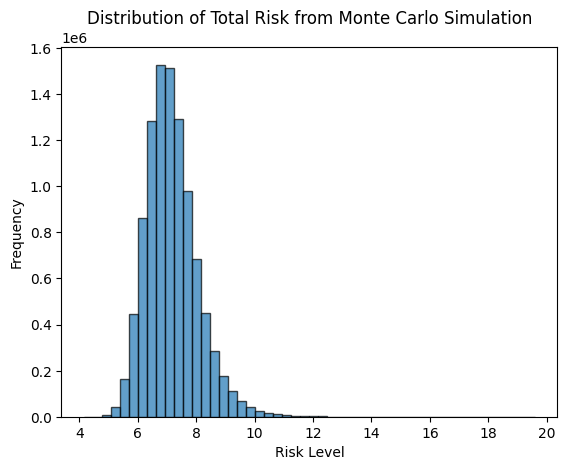

Mean Risk: 7.171190576486968
Median Risk: 7.072774993964423
Standard Deviation: 0.8781284806774327
Risk > 8 Probability: 0.1554471


In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

# Constants for number of simulations
num_simulations = 10000000

# Define random variables based on assumed distributions
def random_time():
    # Time of day between 0 and 24 (assuming higher risk at night)
    return np.random.uniform(0, 24)

def random_people():
    # Number of people nearby (assuming fewer people = higher risk)
    return max(1, np.random.normal(5, 2))  # Mean of 5 people, standard deviation of 2

def random_distance(mean, std_dev):
    # Distances for home, police, populated area in km
    return np.random.normal(mean, std_dev)

def monte_carlo_simulation(num_simulations):
    total_risks = []
    
    for _ in range(num_simulations):
        time = random_time()
        people = random_people()
        d_home = random_distance(21, 5)  # Mean 21 km, Std dev 5 km
        d_police = random_distance(2, 0.5)  # Mean 2 km, Std dev 0.5 km
        d_pop = random_distance(4, 1)  # Mean 4 km, Std dev 1 km

        risk_time = (4 * math.cos((math.pi / 13) * (time - 3))) + 6
        risk_people = (8 * math.exp(-0.05 * people)) + 2
        risk_home = (0.32 * d_home) + 2
        risk_police = math.exp(0.4158 * d_police) + 2
        risk_pop = math.exp(0.4158 * d_pop) + 2

        total_risk = (0.1 * risk_time) + (0.2 * risk_people) + (0.2 * risk_home) + (0.2 * risk_police) + (0.3 * risk_pop)
        
        total_risks.append(total_risk)
    
    return total_risks

# Running the Monte Carlo Simulation
results = monte_carlo_simulation(num_simulations)

plt.hist(results, bins=50, edgecolor='k', alpha=0.7)
plt.title("Distribution of Total Risk from Monte Carlo Simulation")
plt.xlabel("Risk Level")
plt.ylabel("Frequency")
plt.show()

print(f"Mean Risk: {np.mean(results)}")
print(f"Median Risk: {np.median(results)}")
print(f"Standard Deviation: {np.std(results)}")
print(f"Risk > 8 Probability: {np.sum(np.array(results) > 8) / num_simulations}")

In [34]:
def getFrequency(risk: float):
    freq = (risk - 7.171190576487) / 1.125
    return freq

In [35]:
import pandas as pd

df = pd.read_csv('monte_carlo_simulation_results.csv')

In [36]:
df.head()

,Time,People,Distance_Home,Distance_Police,Distance_Pop,Risk_Time,Risk_People,Risk_Home,Risk_Police,Risk_Pop,Total_Risk,Unnamed: 11
0,18.409739,6,19.341928,1.660925,2.829312,2.659288,7.926546,8.189417,3.994937,5.242770,5.860940,NaN
1,4.108320,7,21.770034,1.712407,4.809656,9.857382,7.637505,8.966411,4.038102,9.387985,7.930537,NaN
2,16.253300,1,21.126032,3.240039,4.437193,2.007492,9.609835,8.760330,5.846672,8.328004,7.542518,NaN
3,6.162293,4,15.709564,1.699913,3.315812,8.887737,8.549846,7.027060,4.027541,5.969796,6.600602,NaN
4,3.493491,4,22.049914,1.823670,4.925437,9.971589,8.549846,9.055973,4.134606,9.752356,8.270951,NaN


In [37]:
df.drop('Unnamed: 11', axis=1, inplace=True)

In [38]:
df.head()

,Time,People,Distance_Home,Distance_Police,Distance_Pop,Risk_Time,Risk_People,Risk_Home,Risk_Police,Risk_Pop,Total_Risk
0,18.409739,6,19.341928,1.660925,2.829312,2.659288,7.926546,8.189417,3.994937,5.242770,5.860940
1,4.108320,7,21.770034,1.712407,4.809656,9.857382,7.637505,8.966411,4.038102,9.387985,7.930537
2,16.253300,1,21.126032,3.240039,4.437193,2.007492,9.609835,8.760330,5.846672,8.328004,7.542518
3,6.162293,4,15.709564,1.699913,3.315812,8.887737,8.549846,7.027060,4.027541,5.969796,6.600602
4,3.493491,4,22.049914,1.823670,4.925437,9.971589,8.549846,9.055973,4.134606,9.752356,8.270951


In [39]:
df['Frequency'] = df['Total_Risk'].apply(getFrequency)

In [40]:
df.head()

,Time,People,Distance_Home,Distance_Police,Distance_Pop,Risk_Time,Risk_People,Risk_Home,Risk_Police,Risk_Pop,Total_Risk,Frequency
0,18.409739,6,19.341928,1.660925,2.829312,2.659288,7.926546,8.189417,3.994937,5.242770,5.860940,-1.164667
1,4.108320,7,21.770034,1.712407,4.809656,9.857382,7.637505,8.966411,4.038102,9.387985,7.930537,0.674975
2,16.253300,1,21.126032,3.240039,4.437193,2.007492,9.609835,8.760330,5.846672,8.328004,7.542518,0.330069
3,6.162293,4,15.709564,1.699913,3.315812,8.887737,8.549846,7.027060,4.027541,5.969796,6.600602,-0.507190
4,3.493491,4,22.049914,1.823670,4.925437,9.971589,8.549846,9.055973,4.134606,9.752356,8.270951,0.977564
